## M2S1: Mental health in the Tech Industry
### Introduction

Mental health in the tech industry is becoming an increasingly important topic as the sector is rapidly growing and the fast-paced, high-pressure environment is putting more toll on the well-being of employees. The demand for professional excellence, long working hours and a known culture of overwork can lead to stress, anxiety, burnout and sometimes even more significant detioration of mental health.

In order to take a deeper look at this issue, we will be analyzing "The Mental Health in Tech Survey Dataset" on Kaggle (https://www.kaggle.com/datasets/osmi/mental-health-in-tech-survey). This is a comprehensive collection of survey data compiled responses from tech industry professionals over several years (2014, 2016, 2017, 2018, and 2019). The aim of this survey was to assess the prevalence of mental health issues in the tech industry and to understand the general attitutes towards mental health in the work enviroment. The survey contains whopping 105 questions, some of which are multiple choice, whereas others are open ended. We will be looking at a selected few of these to answer questions such: 

"what is the socioeconomical background of correspondents and are there evidence of sampling bias?"
"Are there discernible correlations between continuous numerical variables? If so, what are they and what do they show and how could they be interpreted?"
"What are the most common health issue problems in the tech industry and what are their prevalence rates? What is the certainly around the values obtained?"
"Is the mental health worse in the tech sector compared to the non-tech industry?"
"What are the best countries and US states for good mental health in the tech industry?"
"Does the size of tech company determine the attitute towards mental health issues? If so what is the pattern?"

The goal of this survey is to answer the mentioned questions and use the answers to these question to assess the mental health problem in the tech and suggest how mental health in the tech could be improved.

We will start by importing some necessary modules, setting the plotting theme, and taking a glance at the dataset:

In [3]:
import numpy as np
import pandas as pd
import sqlite3 as sql
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import pandasql as psql
import warnings

# Setting the theme for all following plots
sns.set_theme(style="whitegrid", palette="pastel")

# Connect to the SQLite database
conn = sql.connect("mental_health.sqlite")

query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql_query(query, conn)
print("Tables contained in the database:")
print(tabulate(tables, tablefmt="pretty"))

# Close the connection to the SQLite database
conn.close()



Tables contained in the database:
+---+----------+
| 0 |  Answer  |
| 1 | Question |
| 2 |  Survey  |
+---+----------+


As we can see there are three tables in the 'mental_health.sqlite' databases: Answer, Question and Survey. Let's have a look at their schemas:

In [4]:
conn = sql.connect("mental_health.sqlite")

# Query to get the schemas of the three tables
table_name1 = "Survey"
query = f"PRAGMA table_info({table_name1});"
schema = pd.read_sql_query(query, conn)
print("Survey schema")
print(tabulate(schema,tablefmt="pretty"),'\n')

table_name2 = "Question"
query = f"PRAGMA table_info({table_name2});"
schema = pd.read_sql_query(query, conn)
print("Question schema")
print(tabulate(schema,tablefmt="pretty"),'\n')

table_name3 = "Answer"
query = f"PRAGMA table_info({table_name3});"
schema = pd.read_sql_query(query, conn)
print("Answer schema")
print(tabulate(schema,tablefmt="pretty"))


conn.close()

Survey schema
+---+---+-------------+--------------+---+--+---+
| 0 | 0 |  SurveyID   |   INTEGER    | 1 |  | 1 |
| 1 | 1 | Description | VARCHAR(255) | 0 |  | 0 |
+---+---+-------------+--------------+---+--+---+ 

Question schema
+---+---+--------------+---------------+---+--+---+
| 0 | 0 | questiontext | VARCHAR(1000) | 0 |  | 0 |
| 1 | 1 |  questionid  |    INTEGER    | 0 |  | 0 |
+---+---+--------------+---------------+---+--+---+ 

Answer schema
+---+---+------------+----------------+---+--+---+
| 0 | 0 | AnswerText | VARCHAR(10000) | 0 |  | 0 |
| 1 | 1 |  SurveyID  |    INTEGER     | 0 |  | 0 |
| 2 | 2 |   UserID   |    INTEGER     | 0 |  | 0 |
| 3 | 3 | QuestionID |    INTEGER     | 0 |  | 0 |
+---+---+------------+----------------+---+--+---+


For the rest of this project we will ignore the Survey and Question tables, since all the information needed can be found in the Answer table. This table contains answers to questions (AnswerText), SurveyID (year), UserID (unique user id), and QuestionID (that corresponds to a given question). So, let's have a look these questions:

In [5]:
conn = sql.connect("mental_health.sqlite")

# Set display options to prevent truncation
pd.set_option("display.max_rows", None)  # Show all rows
pd.set_option("display.max_columns", None)  # Show all columns
pd.set_option("display.max_colwidth", None)  # Show full column width
pd.set_option("display.width", None)  # Adjust to avoid line wrapping

# Query to preview data from a table
cur = conn.cursor()
cur.execute("SELECT * FROM Question")
df = pd.DataFrame(cur.fetchall(), columns=[d[0] for d in cur.description])
cur.close()
df

,questiontext,questionid
0,What is your age?,1
1,What is your gender?,2
2,What country do you live in?,3
3,"If you live in the United States, which state or territory do you live in?",4
4,Are you self-employed?,5
5,Do you have a family history of mental illness?,6
6,Have you ever sought treatment for a mental health disorder from a mental health professional?,7
7,How many employees does your company or organization have?,8
8,Is your employer primarily a tech company/organization?,9
9,Does your employer provide mental health benefits as part of healthcare coverage?,10


That's a lot of questions! before we start the exploratory data analysis, let's have a look at our sample's socioeconomical background. Let's see what's our sample's gender, race, age, country of residence and state.

The table below shows the questions that we will use to answer these questions along with their QuestionIDs:

In [6]:
data = {
    'Question': ['What is your age?','What is your gender?','What country do you live in?', 'What is your race?', 'If you live in the United States, which state or territory do you live in?'],
    'QuestionID': ['1','2','3','89','4']
}
pd.DataFrame(data)


,Question,QuestionID
0,What is your age?,1
1,What is your gender?,2
2,What country do you live in?,3
3,What is your race?,89
4,"If you live in the United States, which state or territory do you live in?",4


We will now create a dataframe containing columns representing answers to these questions, where each row represents a respondent:

In [7]:
conn = sql.connect("mental_health.sqlite")

# SQL query to extract neccessary information
query = """
SELECT 
    a.UserID,
    a.SurveyID AS year,
    MAX(CASE WHEN a.QuestionID = 1 THEN a.AnswerText END) AS age,
    MAX(CASE WHEN a.QuestionID = 2 THEN a.AnswerText END) AS gender,
    MAX(CASE WHEN a.QuestionID = 3 THEN a.AnswerText END) AS country_of_residence,
    MAX(CASE WHEN a.QuestionID = 89 THEN a.AnswerText END) AS race,
    MAX(CASE WHEN a.QuestionID = 4 THEN a.AnswerText END) AS US_state
FROM
    Answer AS a
GROUP BY
    a.UserID
;
"""

# Convert the extracted data to df
sample_df = pd.read_sql_query(query, conn)

conn.close()

pd.set_option("display.width", 1000)  # Adjust to avoid line wrapping

print('The resulting dataframe (sample_df):')
sample_df.tail()

The resulting dataframe (sample_df):


,UserID,year,age,gender,country_of_residence,race,US_state
4213,4214,2019,27,male,India,-1,-1
4214,4215,2019,48,Male,United States of America,White,Louisiana
4215,4216,2019,50,Male,India,-1,-1
4216,4217,2019,30,female,India,-1,-1
4217,4218,2019,24,Female,United States of America,White,Oregon


Then use this dataframe to find sample size; gender, age, racial distribution, country of residence and state (if they live in US):

In [8]:
# Sample size through the years
query1 = """
SELECT
    UserID,
    year
FROM
    sample_df
;
"""

df1 = psql.sqldf(query1,locals())
df1 = df1.groupby('year')['UserID'].nunique().reset_index()
df1.columns = ['year', 'number of respondents']

#Gender through the years
query2 =""" 
SELECT
    year,
    SUM(CASE WHEN gender LIKE 'male' THEN 1 ELSE 0 END) AS male_count,
    SUM(CASE WHEN gender LIKE 'female' THEN 1 ELSE 0 END) AS female_count,
    COUNT(*) - SUM(CASE WHEN gender LIKE 'female' THEN 1 ELSE 0 END) - SUM(CASE WHEN gender LIKE 'male' THEN 1 ELSE 0 END) as other_count
FROM
    sample_df
GROUP BY
    year
;
"""

df2 = psql.sqldf(query2,locals())


# Age through the years
query3 = """ 
SELECT
    year,
    age
FROM
    sample_df
;
"""

df3 = psql.sqldf(query3, locals())
df3['age'] = df3['age'].astype(int)
df3 = df3[(df3['age'] >= 18) & (df3['age'] <= 75)]

# Races through the years
query4 = """ 
SELECT
    SUM(CASE WHEN race LIKE 'White' OR race LIKE 'Caucasian' OR race LIKE 'European American' THEN 1 ELSE 0 END) AS white,
    SUM(CASE WHEN race LIKE 'Hispanic' OR race LIKE 'White Hispanic' THEN 1 ELSE 0 END) AS hispanic,
    SUM(CASE WHEN race LIKE 'Black or African American' THEN 1 ELSE 0 END) AS black,
    SUM(CASE WHEN race LIKE 'Asian' THEN 1 ELSE 0 END) AS asian,
    SUM(CASE WHEN race LIKE 'More than one of the above' THEN 1 ELSE 0 END) AS mixed,
    SUM(CASE WHEN race LIKE 'I prefer not to answer' THEN 1 ELSE 0 END) AS prefered_not_to_answer
FROM
    sample_df
WHERE
    race IS NOT NULL AND race != '-1'
;
"""

df4 = psql.sqldf(query4, locals())

# Where are the respondents from?
query5 = """ 
SELECT
    country_of_residence,
    COUNT(*) AS number_of_respondents
FROM
    sample_df
WHERE
    country_of_residence IS NOT NULL AND country_of_residence != '-1'
GROUP BY
    CASE
        WHEN country_of_residence IN ('United States', 'USA', 'United States of America') THEN 'United States'
        ELSE country_of_residence
    END
ORDER BY
    number_of_respondents DESC;
"""

df5 = psql.sqldf(query5, locals())

# Where in US are the respondents from?
query6 = """ 
SELECT
    US_state,
    COUNT(*) as number_of_respondents
FROM
    sample_df
WHERE
    US_state IS NOT NULL AND US_state != '-1'
GROUP BY
    US_state
ORDER BY
    number_of_respondents DESC
;
"""

df6 = psql.sqldf(query6, locals())

And now we use these new dataframes we created to plot some statistics on our sample:

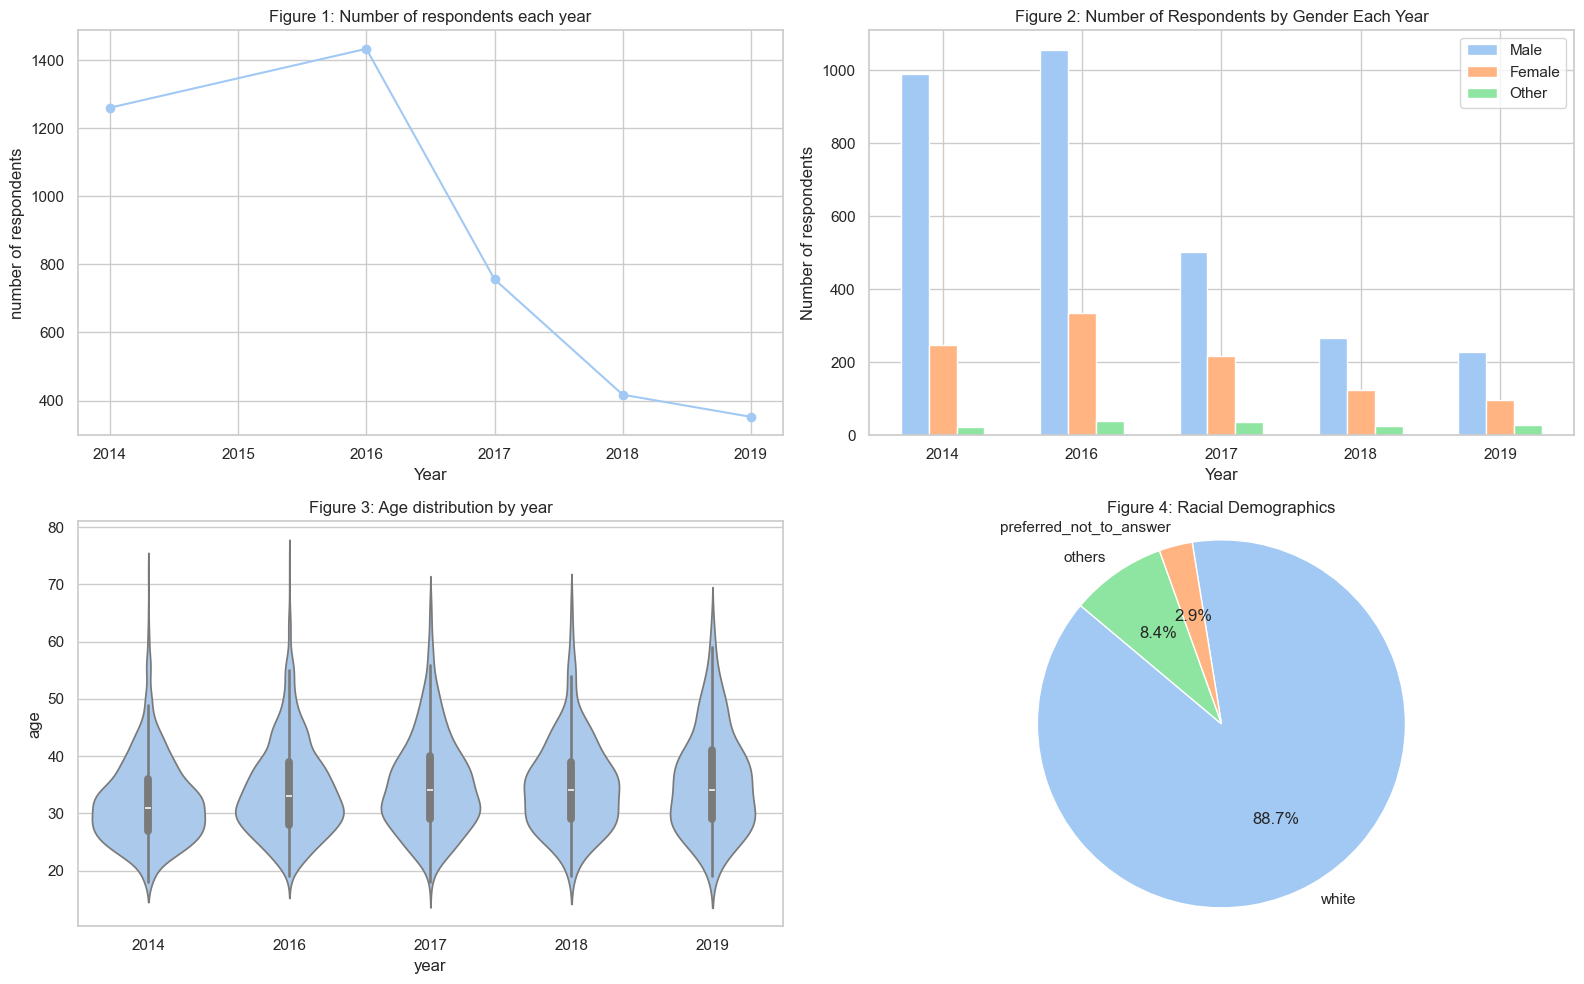

In [9]:
# Create a figure and a set of subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 10))

# Plot in the first subplot
axs[0, 0].plot(df1["year"], df1["number of respondents"], marker="o", linestyle="-", color="b")
axs[0, 0].set_title('Figure 1: Number of respondents each year')
axs[0, 0].set_xlabel('Year')
axs[0, 0].set_ylabel('number of respondents')

# Plot in the second subplot
width = 0.2  # the width of the bars
x = np.arange(len(df2['year']))  # the label locations

axs[0, 1].bar(x - width, df2['male_count'], width, label='Male')
axs[0, 1].bar(x, df2['female_count'], width, label='Female')
axs[0, 1].bar(x + width, df2['other_count'], width, label='Other')

# Adding the x-axis labels and title
axs[0, 1].set_xticks(x)
axs[0, 1].set_xticklabels(df2['year'])
axs[0, 1].set_xlabel('Year')
axs[0, 1].set_ylabel('Number of respondents')
axs[0, 1].set_title('Figure 2: Number of Respondents by Gender Each Year')
axs[0, 1].legend()

# Plot in the third subplot
sns.violinplot(x='year', y='age', data=df3, ax=axs[1,0])
axs[1, 0].set_title('Figure 3: Age distribution by year')

# Pie chart in the fourth subplot

# Combine minority groups into "Others"
df4_combined = pd.DataFrame({
    'white': df4['white'],
    'preferred_not_to_answer': df4['prefered_not_to_answer'],
    'others': df4[['hispanic', 'black', 'asian', 'mixed']].sum(axis=1)
})

race_counts = df4_combined.sum()
labels = race_counts.index
sizes = race_counts.values
axs[1, 1].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
axs[1, 1].set_title('Figure 4: Racial Demographics')
axs[1, 1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adjust the layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()



From figure 1 we can see that the survey did not happen in 2016 and that there was an increase in the sample size going from 2014 to 2016, and a significant drop in the following three years. In terms of gender of the respodents we can observe a possible sampling bias, where a large majory of the sample are males, while females and others are a small percentage (figure 2). However, this could also indicate that males are overrepresented in the tech industry, so they are more likely to be surveyed even with a perfectly random sampling method. For age distributionn (figure 3), we have filtered out people to only include 18 to 75 year olds, since there were respondents who claimed to be 329 year old or even -29. We can see that the large majority of respondents are from mid twenties to late thirties and this distributions does not seem to change very much over the years. In terms of racial distribution of the respondents (figure 4), there is evidence of sampling bias, since 88.7% of respondents were white.

Now let's look at the country/location of residence of the respondents:

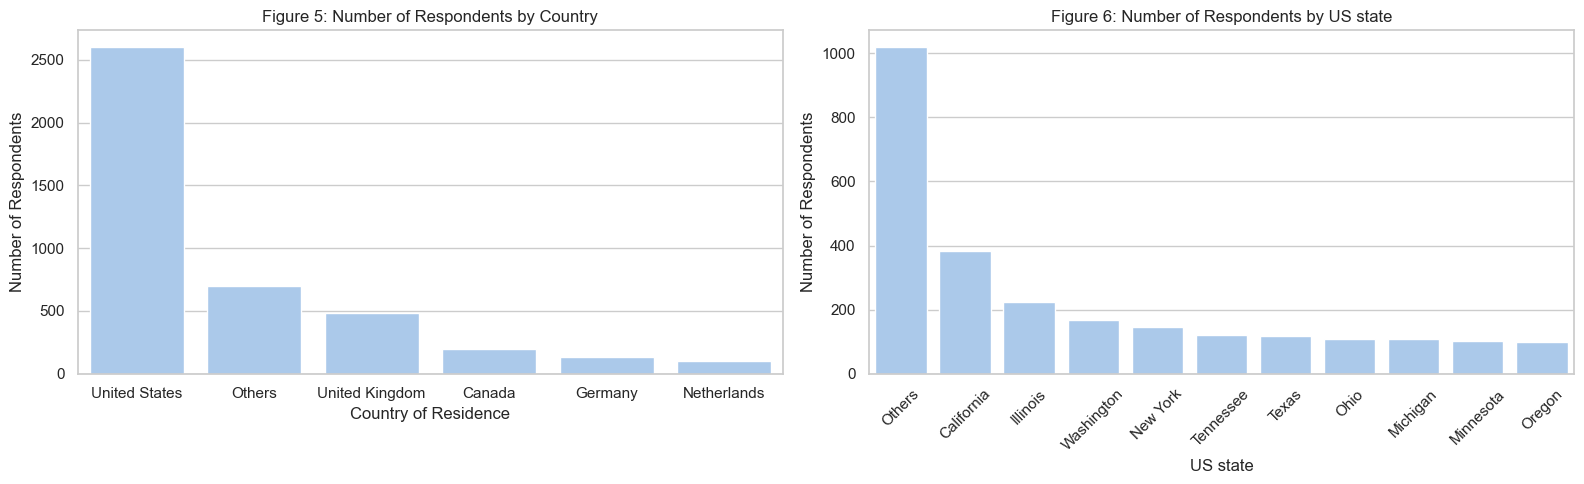

In [10]:
# Create a figure and a set of subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# 1st subplot:
# Sort by the number of respondents and select top 5 countries
top_countries = df5.nlargest(5, 'number_of_respondents')
rest_of_countries = df5[~df5['country_of_residence'].isin(top_countries['country_of_residence'])]
rest_of_countries_sum = rest_of_countries['number_of_respondents'].sum()

# Create a new DataFrame with top 5 countries and an "Others" group
data_combined = {
    'country_of_residence': top_countries['country_of_residence'].tolist() + ['Others'],
    'number_of_respondents': top_countries['number_of_respondents'].tolist() + [rest_of_countries_sum]
}
df_combined = pd.DataFrame(data_combined)

# Sort combined DataFrame in descending order
df_combined_sorted = df_combined.sort_values('number_of_respondents', ascending=False)

# Bar plot in the first subplot
sns.barplot(ax=axs[0], x='country_of_residence', y='number_of_respondents', data=df_combined_sorted, errorbar=None)
axs[0].set_title('Figure 5: Number of Respondents by Country')
axs[0].set_xlabel('Country of Residence')
axs[0].set_ylabel('Number of Respondents')

# Sort by the number of respondents and select top 5 countries
top_countries = df5.nlargest(5, 'number_of_respondents')
rest_of_countries = df5[~df5['country_of_residence'].isin(top_countries['country_of_residence'])]
rest_of_countries_sum = rest_of_countries['number_of_respondents'].sum()

# 2nd subplot:
# Sort by the number of respondents and select top 10 states
top_states = df6.nlargest(10, 'number_of_respondents')
rest_of_states = df6[~df6['US_state'].isin(top_states['US_state'])]
rest_of_states_sum = rest_of_states['number_of_respondents'].sum()

# Create a new DataFrame with top 10 states and an "Others" group
data_combined = {
    'US_state': top_states['US_state'].tolist() + ['Others'],
    'number_of_respondents': top_states['number_of_respondents'].tolist() + [rest_of_states_sum]
}
df_combined = pd.DataFrame(data_combined)

# Sort combined DataFrame in descending order
df_combined_sorted = df_combined.sort_values('number_of_respondents', ascending=False)

# Bar plot in the first subplot
sns.barplot(ax=axs[1], x='US_state', y='number_of_respondents', data=df_combined_sorted, errorbar=None)
axs[1].set_title('Figure 6: Number of Respondents by US state')
axs[1].set_xlabel('US state')
axs[1].set_ylabel('Number of Respondents')
plt.xticks(rotation=45)

plt.tight_layout()


We can see that top three countries by the number of respondents are United States, United Kingdom, and Canada (figure 5). This again is indicitive of sampling bias, since all three countries are english speaking, so we must be careful with inference, as our sample is, indeed, biased. Since so many respondents are from US, we  decided to look at the top states in terms of number of respondents. The top three states were California, Illinois, Washington; however, most US states had at least some respondents, which are represented by the 'Others' bar.

### Conclusions about sample
The sample appears to be somewhat biased with most respondents being male, white and from english-speaking countries (mostly US).

## Exploratory Data Analysis
Now, explore the data a bit deeper by looking for correlations between continiuos variables.

### DATA CLEANUP
First, we need import all answers and pivot the df from melted (long) form to wide form, this will make it easier to manipulate data later:

In [11]:
conn = sql.connect("mental_health.sqlite")

query7 = """
SELECT * FROM Answer
;
"""

df = pd.read_sql_query(query7, conn)
conn.close()

print('Melted (long) form dataframe:')
display(df.head())

# Pivot the DataFrame to wide format to make it easier to do
df_pivot = df.pivot_table(index=['UserID', 'SurveyID', ], columns='QuestionID', values='AnswerText', aggfunc='first')

# Reset the index to make SurveyID a column again
df_wide = df_pivot.reset_index()

# Rename columns to remove multi-level indexing
df_wide.columns.name = None

print('\nWide form dataframe after pivoting:')
display(df_wide.head())


Melted (long) form dataframe:


,AnswerText,SurveyID,UserID,QuestionID
0,37,2014,1,1
1,44,2014,2,1
2,32,2014,3,1
3,31,2014,4,1
4,31,2014,5,1



Wide form dataframe after pivoting:


,UserID,SurveyID,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118
0,1,2014,37,Female,United States,Illinois,-1,No,1,6-25,1,Yes,Yes,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Yes,Often,No,Not sure,No,Yes,Somewhat easy,No,Some of them,Yes,Maybe,No,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2014,44,Male,United States,Indiana,-1,No,0,More than 1000,0,Don't know,Don't know,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Don't know,Rarely,No,No,Don't know,Don't know,Don't know,Maybe,No,No,No,No,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2014,32,Male,Canada,-1,-1,No,0,6-25,1,No,Don't know,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No,Rarely,No,No,No,No,Somewhat difficult,No,Yes,Yes,Yes,No,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2014,31,Male,United Kingdom,-1,-1,Yes,1,26-100,1,No,No,Maybe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,No,Often,No,Yes,No,No,Somewhat difficult,Yes,Some of them,No,Maybe,Yes,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2014,31,Male,United States,Texas,-1,No,0,100-500,1,Yes,Don't know,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Don't know,Never,Yes,No,Don't know,Don't know,Don't know,No,Some of them,Yes,Yes,No,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now that we have a wide format df, let's look at the country of residence (column 3):

In [12]:
country_counts = df_wide[3].value_counts().reset_index()
country_counts.rename(columns={3: 'Country'}, inplace=True)
print('Country and number of times it appears in the survey:')
display(country_counts.head())

Country and number of times it appears in the survey:


,Country,count
0,United States of America,1853
1,United States,751
2,United Kingdom,482
3,Canada,199
4,Germany,136


We can see that USA has two different names, so we are going convert United States to United States of America:

In [13]:
# Make a function to do the conversion
def US_converter(country):
    if country.strip() == 'United States':
        return 'United States of America'
    return country


# Standardize US names
df_wide[3] = df_wide[3].apply(US_converter)

print("\nDataFrame after standardizing country names:")
display(df_wide.head())

print('\nDouble check with the value_count function:')
display(df_wide[3].value_counts().reset_index().head())
country_counts.rename(columns={3: 'Country'}, inplace=True)




DataFrame after standardizing country names:


,UserID,SurveyID,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118
0,1,2014,37,Female,United States of America,Illinois,-1,No,1,6-25,1,Yes,Yes,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Yes,Often,No,Not sure,No,Yes,Somewhat easy,No,Some of them,Yes,Maybe,No,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2014,44,Male,United States of America,Indiana,-1,No,0,More than 1000,0,Don't know,Don't know,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Don't know,Rarely,No,No,Don't know,Don't know,Don't know,Maybe,No,No,No,No,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2014,32,Male,Canada,-1,-1,No,0,6-25,1,No,Don't know,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No,Rarely,No,No,No,No,Somewhat difficult,No,Yes,Yes,Yes,No,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2014,31,Male,United Kingdom,-1,-1,Yes,1,26-100,1,No,No,Maybe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,No,Often,No,Yes,No,No,Somewhat difficult,Yes,Some of them,No,Maybe,Yes,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2014,31,Male,United States of America,Texas,-1,No,0,100-500,1,Yes,Don't know,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Don't know,Never,Yes,No,Don't know,Don't know,Don't know,No,Some of them,Yes,Yes,No,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Double check with the value_count function:


,3,count
0,United States of America,2604
1,United Kingdom,482
2,Canada,199
3,Germany,136
4,Netherlands,98


We can see in both table that the convesion was from United States to United States of America was successful. Now, let's remove leading and trailing spaces, and also let's convert -1 (which indicates a missing value) to NaN- as this should help in our further correlation analysis.

In [14]:
# This is to kill the depreciation warning
pd.set_option('future.no_silent_downcasting', True)

# Removing leading and trailing spaces
for col in df_wide.columns:
    if df_wide[col].dtype == 'object':  # Apply only to string columns
        df_wide[col] = df_wide[col].map(lambda x: x.strip() if isinstance(x, str) else x)

# Convert -1 to NaN
df_wide.replace('-1', np.nan, inplace=True)

print('Dataframe after space removal and conversion of -1s to NaNs')
display(df_wide.head())

Dataframe after space removal and conversion of -1s to NaNs


,UserID,SurveyID,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118
0,1,2014,37,Female,United States of America,Illinois,NaN,No,1,6-25,1,Yes,Yes,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Yes,Often,No,Not sure,No,Yes,Somewhat easy,No,Some of them,Yes,Maybe,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2014,44,Male,United States of America,Indiana,NaN,No,0,More than 1000,0,Don't know,Don't know,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Don't know,Rarely,No,No,Don't know,Don't know,Don't know,Maybe,No,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2014,32,Male,Canada,NaN,NaN,No,0,6-25,1,No,Don't know,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No,Rarely,No,No,No,No,Somewhat difficult,No,Yes,Yes,Yes,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2014,31,Male,United Kingdom,NaN,NaN,Yes,1,26-100,1,No,No,Maybe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,No,Often,No,Yes,No,No,Somewhat difficult,Yes,Some of them,No,Maybe,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2014,31,Male,United States of America,Texas,NaN,No,0,100-500,1,Yes,Don't know,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Don't know,Never,Yes,No,Don't know,Don't know,Don't know,No,Some of them,Yes,Yes,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


It appears that the conversion was to NaN was successful, now let's take a look at the column types:

In [15]:
print('Column data types and their counts:')
display(df_wide.dtypes.value_counts().reset_index())

Column data types and their counts:


,index,count
0,object,105
1,int64,2


As we can see the AnswerText columns are 'object' or 'str' type, so we need to convert them to numerical type to be able to run a correlation analysis:

In [55]:
# This is to kill the depreciation warning
pd.set_option('future.no_silent_downcasting', True)

# Function to attempt conversion to numeric
def try_convert_to_numeric(col):
    return pd.to_numeric(col, errors='coerce').fillna(col)

# Apply conversion to all columns except 'UserID' and 'SurveyID'
for col in df_wide.columns:
    if col not in ['UserID', 'SurveyID']:
        df_wide[col] = try_convert_to_numeric(df_wide[col])

# Removing leading and trailing spaces again
for col in df_wide.columns:
    if df_wide[col].dtype == 'object':  # Apply only to string columns
        df_wide[col] = df_wide[col].map(lambda x: x.strip() if isinstance(x, str) else x)

print('Column data types and their counts after conversion to numerical dtypes:')
display(df_wide.dtypes.value_counts().reset_index())

Column data types and their counts after conversion to numerical dtypes:


,index,count
0,object,80
1,float64,24
2,int64,3


As we can see we were able to convert 25 columns to numerical types! Let's have a look at some summary statistics for these numerical columns:

In [17]:
df_wide.describe()

,UserID,SurveyID,1,5,7,9,13,20,22,58,60,62,64,65,68,70,72,74,76,77,78,79,80,81,84,85,88
count,4218.000000,4218.000000,4213.000000,4200.000000,4218.000000,3714.000000,1571.000000,504.000000,2958.000000,1308.000000,1304.000000,1302.000000,1308.000000,1308.000000,1326.000000,1326.000000,1322.000000,1319.000000,1326.000000,1326.000000,1523.000000,180.000000,60.000000,1523.000000,0.0,1523.000000,1523.000000
mean,2109.500000,2016.029872,33.956800,0.154762,0.571835,0.777598,0.936346,0.668651,0.875592,0.322630,0.445552,0.482335,6.256116,4.974771,0.679487,0.226998,0.354009,0.332070,5.394419,3.466063,0.120158,0.338889,3.900000,5.327643,NaN,2.547603,0.351280
std,1217.776047,1.587555,10.414944,0.361721,0.494871,0.415916,0.244213,0.471166,0.330103,0.467661,0.497217,0.499880,2.278807,2.498074,0.466850,0.419050,0.478393,0.471134,2.551613,2.501618,0.325253,0.474652,2.355664,2.219775,NaN,0.937361,0.477527
min,1.000000,2014.000000,-29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,0.000000
25%,1055.250000,2014.000000,28.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.000000,3.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000,4.000000,NaN,2.000000,0.000000
50%,2109.500000,2016.000000,33.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,7.000000,5.000000,1.000000,0.000000,0.000000,0.000000,5.000000,3.000000,0.000000,0.000000,3.000000,5.000000,NaN,3.000000,0.000000
75%,3163.750000,2017.000000,38.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,7.000000,1.000000,0.000000,1.000000,1.000000,7.000000,5.000000,0.000000,1.000000,5.250000,7.000000,NaN,3.000000,1.000000
max,4218.000000,2019.000000,329.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,10.000000,1.000000,1.000000,1.000000,1.000000,10.000000,10.000000,1.000000,1.000000,10.000000,10.000000,NaN,5.000000,1.000000


We can see that majority of Answer columns are in the range of 0-1, 0-10 and 1-5, except for column 1 ('What is your age?'), which has entries of -29 and 329 year. This is obviously wrong, hence we will clean up the column by removing values above 75 and below 18:

In [18]:
# Convert column '1' values larger than 75 and lower than 18 to NaN
df_wide[1] = df_wide[1].apply(lambda x: np.nan if (x > 75 or x < 18) else x)
summary = df_wide.describe()
summary

,UserID,SurveyID,1,5,7,9,13,20,22,58,60,62,64,65,68,70,72,74,76,77,78,79,80,81,84,85,88
count,4218.000000,4218.000000,4202.000000,4200.000000,4218.000000,3714.000000,1571.000000,504.000000,2958.000000,1308.000000,1304.000000,1302.000000,1308.000000,1308.000000,1326.000000,1326.000000,1322.000000,1319.000000,1326.000000,1326.000000,1523.000000,180.000000,60.000000,1523.000000,0.0,1523.000000,1523.000000
mean,2109.500000,2016.029872,33.859829,0.154762,0.571835,0.777598,0.936346,0.668651,0.875592,0.322630,0.445552,0.482335,6.256116,4.974771,0.679487,0.226998,0.354009,0.332070,5.394419,3.466063,0.120158,0.338889,3.900000,5.327643,NaN,2.547603,0.351280
std,1217.776047,1.587555,8.065024,0.361721,0.494871,0.415916,0.244213,0.471166,0.330103,0.467661,0.497217,0.499880,2.278807,2.498074,0.466850,0.419050,0.478393,0.471134,2.551613,2.501618,0.325253,0.474652,2.355664,2.219775,NaN,0.937361,0.477527
min,1.000000,2014.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,0.000000
25%,1055.250000,2014.000000,28.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.000000,3.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000,4.000000,NaN,2.000000,0.000000
50%,2109.500000,2016.000000,33.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,7.000000,5.000000,1.000000,0.000000,0.000000,0.000000,5.000000,3.000000,0.000000,0.000000,3.000000,5.000000,NaN,3.000000,0.000000
75%,3163.750000,2017.000000,38.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,7.000000,1.000000,0.000000,1.000000,1.000000,7.000000,5.000000,0.000000,1.000000,5.250000,7.000000,NaN,3.000000,1.000000
max,4218.000000,2019.000000,74.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,10.000000,1.000000,1.000000,1.000000,1.000000,10.000000,10.000000,1.000000,1.000000,10.000000,10.000000,NaN,5.000000,1.000000


As we can see, the outliers in column 1 were successfully removed. Now, to run a correlation analysis we have to find numerical columns that have 10 or more unique values. This is the lowest 'granularity' of data, where Pearson correlation makes sense. For this correlation analysis we will obviously ignore UserID (even though it has 4218 unique values), since it's simply an identifier, and SurveyID, because of only 5 unique values:

In [19]:
# Adding the numerical columns to a list
numerical_columns = []
ignore_columns = ['UserID', 'SurveyID'] 
for i in summary.columns:
    if i not in ignore_columns:
        numerical_columns.append(i)

# Find the number of unique values in numerical columns
columns_to_include = []
for i in numerical_columns:
    num_unique_values = df_wide[i].nunique()
    print(f"Number of unique values in column {i}: {num_unique_values}")	
    if num_unique_values >= 10:
        columns_to_include.append(i)
        
print(f'\nColumns between which we can run correlation analysis: {columns_to_include}')

Number of unique values in column 1: 53
Number of unique values in column 5: 2
Number of unique values in column 7: 2
Number of unique values in column 9: 2
Number of unique values in column 13: 2
Number of unique values in column 20: 2
Number of unique values in column 22: 2
Number of unique values in column 58: 2
Number of unique values in column 60: 2
Number of unique values in column 62: 2
Number of unique values in column 64: 11
Number of unique values in column 65: 11
Number of unique values in column 68: 2
Number of unique values in column 70: 2
Number of unique values in column 72: 2
Number of unique values in column 74: 2
Number of unique values in column 76: 11
Number of unique values in column 77: 11
Number of unique values in column 78: 2
Number of unique values in column 79: 2
Number of unique values in column 80: 10
Number of unique values in column 81: 11
Number of unique values in column 84: 0
Number of unique values in column 85: 5
Number of unique values in column 88:

In [ ]:
# List of questions corresponding to each QuestionID
question_list = [
    'What is your age?',
    'Overall, how much importance does your employer place on physical health?',
    'Overall, how much importance does your employer place on mental health?',
    'Overall, how much importance did your previous employer place on physical health?',
    'Overall, how much importance did your previous employer place on mental health?',
    'How has being identified as a person with a mental health issue affected your career?',
    'If they knew you suffered from a mental health disorder, how do you think that your team members/co-workers would react?'
]

# Create a dictionary from the lists
data = {
    'QuestionID': columns_to_include,
    'Question': question_list
}

questions = pd.DataFrame(data)
print('Questions corresponding to numerical variables with 10 or more unique values:')
display(questions)

Questions corresponding to numerical variables with 10 or more unique values:


,QuestionID,Question
0,1,What is your age?
1,64,"Overall, how much importance does your employer place on physical health?"
2,65,"Overall, how much importance does your employer place on mental health?"
3,76,"Overall, how much importance did your previous employer place on physical health?"
4,77,"Overall, how much importance did your previous employer place on mental health?"
5,80,How has being identified as a person with a mental health issue affected your career?
6,81,"If they knew you suffered from a mental health disorder, how do you think that your team members/co-workers would react?"


Question nr. 79 is "Has being identified as a person with a mental health issue affected your career?" and the following (numerical 'continuous') question/answer is 'How has it affected your career?'. Since question/answer 80 is directly related to question/answer 79, we have decided to paraphrase the question nr. 80 to  the one in the table above.

Now, let's run the correlation analysis on the questions/answers:

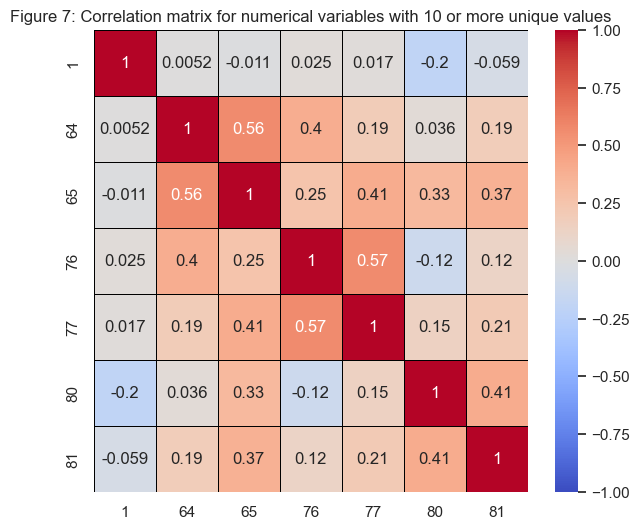

In [37]:
# Create a subset of the DataFrame with only the selected columns
df_subset = df_wide[columns_to_include]

# Calculate the correlation matrix
corr_matrix = df_wide[columns_to_include].corr()

# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(7,6))
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5, linecolor='black', vmin=-1, vmax=1)
plt.title('Figure 7: Correlation matrix for numerical variables with 10 or more unique values')
plt.show()

We can observe quite a few correlations between variables, let's go through them all in a sequential manner.

There appears to be a weak negative correlation (-0.2) between age and perceived effect on career of being identified as a person with a mental illness. Assuming that higher values in q.80 mean larger effect, it seems that older people tend to perceive less influence on their career after being identified as person with a mental health issue. There seems to be no other correlations between age and other variables.

There appears to be a moderately strong correlation (+0.56) between how much importance the employer places on physical (q.64) and mental (q.65) health, which is something that we would expect to see- more caring employer, in general, tend to care more about both aspects of human health. Also, we can observe a moderate (+0.4) correlation between perceived importance of physical health in current employer (q.64) and previous employer (q.76), it is interesting that there is a correlation between these two variables, but what this could mean is that respondents, who perceive their as employer more caring will be more likely to perceive their next employer as more caring too, also the opposite would also be true. Thirdly, there is a weak correlation (+0.19) between perceived importance of physical health in current employer (q.64) and perceived importance of mental health in past employer. Lastly, there is a weak correlation( +0.19) between q.64 and question about co-worker reaction, given they know about presence of mental illness, which is interesting, because it shows that if the employer cares about your physical health, your co-workers are little bit more likely to have a less negative reaction.

For the question regarding how much importance the employer places on mental health (q.65), we can observe four unmentioned correlations with: perceived importance of physical health in previous employer (q.76, weak correlation +0.25), perceived importance of mental health in previous employer (q.77, moderately weak correlation +0.41), the magnitute of effect of being identified as mentally ill (q.80, weak correlation +0.33), and opinions about co-worker reactions, given the knowledge of the presence of mental illness. All of these are similar to patterns discussed in the previous paragraph.

There is a moderately strong (+0.57) correlation between the perceived importance placed by the previous employer on physical health (q.76) and mental health (q.77), which is extremely similar to the same correlation, but regarding current employer (q.64 vs. q.65, +0.56 correlation). This, again, shows us from two correlations, that employers that tend to care about physical health, also tend to care about workers' mental health and vice versa.

Lastly, there is a moderate correlation (+0.41) between q.80 and q.81, which makes sense because both questions are related to people's workplace perceptions of mental illness. More positive reactions from coworkers, given positive mental illness status means more positive career outcomes when being identified as mentally ill.

## Prevalence of mental illness in the Tech industry
Now, let's try to answer the question: "what are the three most prevalent mental illnesses in the Tech and what are their prevalence rates?". Unfortunately, there isn't a direct question in the survey that would answer it. The closest two question is "If yes, what condition(s) have you been diagnosed with? (QuestionID = 115)", which is preceded by "Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue? (QuestionID = 114)". So, we will try to estimate prevalence rates of three most common mental illnesses in the Tech industry, but important nuance here is that it the answer to q.115 will give prevalence rate of mental illness in Tech, but only of those THAT THINK THAT CO-WORKERS WOULD VIEW THEM MORE NEGATIVE IF THEY KNEW THE RESPONDENT SUFFERED FROM MENTAL ILLNESS, which will significantly prop up anxiety and mood disorders, due to the very nature of these illnesses!

Taking that into consideration, let's proceed. Let's create a new dataframe with the counts of mental illness incidence rates:

In [22]:
# Creating a new dataframe
mental_illness = df_wide[[9,115]]
print(f'number of total respondents: {len(mental_illness)}')

# Filtering out respondents that do not work for a tech company/organization and don't have a mental illness
mental_illness = mental_illness[mental_illness[9] == 1.0] # Yes, to the question whether your employer is a Tech company
mental_illness = mental_illness.dropna(subset=[115])
print(f'number of respondents that work in the tech and have mental illness in 2016: {len(mental_illness)}\n')

mental_illness = mental_illness[115].value_counts().reset_index()
mental_illness.rename(columns={115:'Mental Disorder'}, inplace=True)
print('Mental illness and it\'s count for people in Tech in 2016:')
display(mental_illness) 



number of total respondents: 4218
number of respondents that work in the tech and have mental illness in 2016: 344

Mental illness and it's count for people in Tech in 2016:


,Mental Disorder,count
0,"Anxiety Disorder (Generalized, Social, Phobia, etc)",204
1,"Mood Disorder (Depression, Bipolar Disorder, etc)",105
2,Attention Deficit Hyperactivity Disorder,12
3,"Psychotic Disorder (Schizophrenia, Schizoaffective, etc)",4
4,Post-traumatic Stress Disorder,3
5,Obsessive-Compulsive Disorder,3
6,Stress Response Syndromes,2
7,"Eating Disorder (Anorexia, Bulimia, etc)",2
8,Seasonal Affective Disorder,1
9,Addictive Disorder,1


As we can see the most prevalent conditions in the tech are: anxiety disorders, mood disorders and ADHD. No, let's find the sample size of tech workers in 2016, when the q.115 was answered, calculate the prevalence and plot it along with 95% confidence intervals:

Sample size in 2016: 883


Dataframe for plotting the prevalence rate of 3 most common mental issues in the Tech:


,index,Mental Disorder,count,prevalence_rate (%),standart_error,ci
0,0,"Anxiety Disorder (Generalized, Social, Phobia, etc)",204,23.103058,1.418433,2.780129
1,1,"Mood Disorder (Depression, Bipolar Disorder, etc)",105,11.891280,1.089290,2.135008
2,2,Attention Deficit Hyperactivity Disorder,12,1.359003,0.389636,0.763686


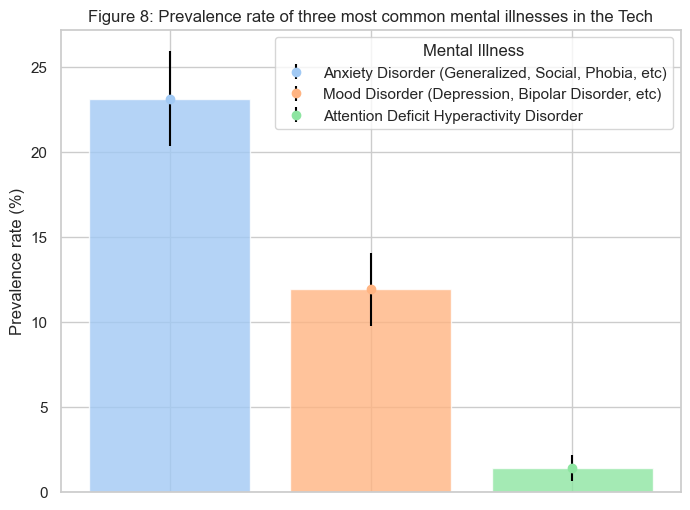

In [23]:
# Calculate the total number of respondents in Tech in 2016, when the Question 115 was answered
sample_size_2016 = len(df_wide[(df_wide['SurveyID'] == 2016) & (df_wide[9] == 1.0)])
print(f'Sample size in 2016: {sample_size_2016}\n\n')

# Creating a new df
top3_counts = mental_illness.iloc[:3].reset_index()

# Calculating and adding prevalence rates,std_error and ci
top3_counts['prevalence_rate (%)'] = top3_counts['count']/sample_size_2016 * 100
top3_counts['standart_error'] = np.sqrt((top3_counts['prevalence_rate (%)'] * (100 - top3_counts['prevalence_rate (%)'])) /sample_size_2016)
top3_counts['ci'] = 1.96 * top3_counts['standart_error'] # this is half of the 95% CI

print('Dataframe for plotting the prevalence rate of 3 most common mental issues in the Tech:')
display(top3_counts)
print('\n')

fig, ax = plt.subplots(figsize=(8,6))

# Plotting each mental illness separately with its own label
for index, row in top3_counts.iterrows():
    ax.errorbar(x=[row['Mental Disorder']], y=[row['prevalence_rate (%)']], yerr=[row['ci']], fmt='o', ecolor='black', label=row['Mental Disorder'])
    ax.bar(x=[row['Mental Disorder']], height=[row['prevalence_rate (%)']], alpha=0.8)

# Adding labels and title
ax.set_ylabel('Prevalence rate (%)')
ax.set_title('Figure 8: Prevalence rate of three most common mental illnesses in the Tech')

# Remove x-axis ticks 
ax.tick_params(axis='x', which='both', bottom=False, top=False, right=False, labelbottom=False, labelleft=False)

# Displaying legend
ax.legend(title='Mental Illness')

plt.show()
#fmt='o', color='black'

To reiterate, there is certainly a bias in the plotted prevalence rate, due to the fact that only people who answered 'yes' to "Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue? (QuestionID = 114)" question are plotted in the Figure 8, which probably props up anxiety and mood disorders and artificially decreases ADHD prevalence rate. It is likely that depressed and anxious people are more likely to think that they would be viewed more negatively if co-workers knew about their conditions, whereas for ADHD it is the opposite as it is very common in USA (where most of the respondents are from) and the disorder is not characterized by excessive worry or negative world views.

Having said that, we can now address the figure 8. We can see that the prevalence rate of anxiety disorders is 23.1 ± 2.8(%), so 95%CI = 20.3-25.9(%); for mood disorders it is 11.9 ± 2.1(%), so 95%CI= 9.8-14.0(%); for ADHD it is 1.4 ± 0.8(%), so 95%CI= 0.6-2.2 (%). 95% CI is a range, where we are 95% certain that the REAL value lies in. The real value, in this case, means that if we were to take all the people in the tech and calculated the prevalence rate for the mental in=llnesses. So, overall, we could say that people in the Tech industry are quite anxious and depressed. Which makes one wonder, then:

## Are people working in tech more susceptible to mental illness?
Let's answer this question by looking at the following questions:

In [24]:
qid = [9,34]

question_list = [
    'Is your employer primarily a tech company/organization?',
    'Have you ever been diagnosed with a mental health disorder?',
]

# Create a dictionary from the lists
data = {
    'QuestionID': qid,
    'Question': question_list
}

pd.DataFrame(data)

,QuestionID,Question
0,9,Is your employer primarily a tech company/organization?
1,34,Have you ever been diagnosed with a mental health disorder?


We will compare the percentage of people who have been diagnosed with a mental illness people in the Tech vs non-Tech. To do so, we will create a dataframe (longlist-form) of yes/no values for q.9 and q.34:

In [25]:
# Creating a new dataframe
df_diagnosis = df_wide[[9,34]]
print(f'number of total respondents: {len(df_diagnosis)}')

# Drop rows with missing values
df_diagnosis = df_diagnosis.dropna()
print(f'Number of total respondents without missing values: {len(df_diagnosis)}\n')

# Map 1.0 to 'Yes' and 0.0 to 'No' 
df_diagnosis[9] = df_diagnosis[9].map({1.0: 'Yes', 0.0: 'No'})

print('Longlist dataframe:')
df_diagnosis.head()


number of total respondents: 4218
Number of total respondents without missing values: 1719

Longlist dataframe:


,9,34
1260,Yes,Yes
1261,Yes,Yes
1262,Yes,No
1264,No,Yes
1265,Yes,No


Then we will create a crosstab table out the longlist dataframe:

In [26]:

# Create a crosstab to count occurrences
crosstab = pd.crosstab(df_diagnosis[9], df_diagnosis[34], margins=False)

# Flatten the crosstab to match the desired format
result = crosstab.stack().reset_index()
result.columns = ['Work in tech?', 'Been Diagnosed?', 'Count']

print("\nResulting DataFrame:")
result



Resulting DataFrame:


,Work in tech?,Been Diagnosed?,Count
0,No,No,133
1,No,Yes,291
2,Yes,No,458
3,Yes,Yes,837


Then we 'flatten the dataframe' by removing the No values in 'Been diagnosed?' column and calculate the percent of diagnosed per group:

In [27]:
# Group by 'Work in tech?' and calculate the total count for each group
total_counts = result.groupby('Work in tech?')['Count'].transform('sum')

# Calculate the percentage
result['Percentage'] = (result['Count'] / total_counts) * 100

print("\nDataFrame with percentage column:")
result = result.drop(index=[0,2])
result



DataFrame with percentage column:


,Work in tech?,Been Diagnosed?,Count,Percentage
1,No,Yes,291,68.632075
3,Yes,Yes,837,64.633205


Now we just calculate the standart error, 95% confidence interval and plot the result:

Final dataframe used for plotting:


,Work in tech?,Been Diagnosed?,Count,Percentage,n,standart_error,ci
1,No,Yes,291,68.632075,424.0,2.253323,4.416514
3,Yes,Yes,837,64.633205,1295.0,1.328589,2.604035


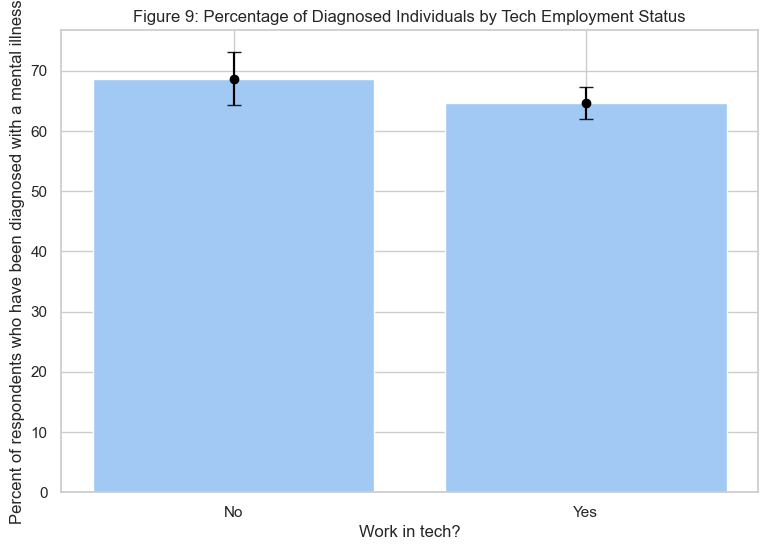

In [51]:

# Calculate total count
result['n'] = result['Count'] / (result['Percentage'] / 100)


# Calculate standart error and CI
result['standart_error'] = np.sqrt(result['Percentage'] * (100 - result['Percentage']) / result['n'])
result['ci'] = 1.96 * result['standart_error']

print('Final dataframe used for plotting:')
display(result)
print('\n')

# Creating the bar plot
plt.figure(figsize=(9, 6))
bars = plt.bar(result['Work in tech?'], result['Percentage'], yerr=result['ci'], capsize=5)

# Adding error bars
plt.errorbar(result['Work in tech?'], result['Percentage'], yerr=result['ci'], fmt='o', color='black')

# Adding labels and title
plt.xlabel('Work in tech?')
plt.ylabel('Percent of respondents who have been diagnosed with a mental illness')
plt.title('Figure 9: Percentage of Diagnosed Individuals by Tech Employment Status')

# Displaying the plot
plt.show()

Even though we saw earlier that many in the tech industry are anxious and depressed, it does not appear that tech workers are significantly more affected by mental health issues than the rest. However, the statistic for both groups is rather terrifying as approx. 68% of people working in non-Tech have been diagnosed with a mental illness at some point in their life, where around 65% of people working in the Tech have been diagnosed with a mental health illness. However, due to everlapping confidence intervals we cannot claim that there is a statistically significant difference between the two groups.

Since Tech industry does not appear to be the culprit of poor mental health among workers, could it be cultural phenomenon associated with the geography of the workplace?

## What are the best countries and US states for a healthy mind in the Tech industry?

In the following section, we will try to identify countries and US states that are the best and the worst when it comes to mental illness.

To do that we will create a new dataframe with the answer to the following questions:

In [29]:
qid = [9,50,65]

question_list = [
    'Is your employer primarily a tech company/organization?',
    'What country do you work in?',
    'Overall, how much importance does your employer place on mental health?',
]

# Create a dictionary from the lists
data = {
    'QuestionID': qid,
    'Question': question_list
}

pd.DataFrame(data)

,QuestionID,Question
0,9,Is your employer primarily a tech company/organization?
1,50,What country do you work in?
2,65,"Overall, how much importance does your employer place on mental health?"


Now, using these questionIDs we can rank the countries by the perceived importance that the employer places on mental health:

In [30]:
# Creating a new dataframe
df_countries = df_wide[[9,50,65]]
print(f'number of total respondents: {len(df_countries)}')

# Filtering out respondents that do not work for a tech company/organization
df_countries = df_countries[df_countries[9] == 1.0]
print(f'number of respondents that work in tech: {len(df_countries)}\n')

# Group df by country and add count and average_score columns
df_countries = df_countries.groupby(50).agg(
    count = (65, 'size'),
    average_score = (65, 'mean')
).reset_index()

# Sort df by average_score
df_countries_sorted = df_countries.sort_values(by='average_score', ascending=False).reset_index()

# Clean up the df
df_countries_sorted = df_countries_sorted.rename(columns={50:'country'}).drop(columns=['index'])

print('Overall, how much importance does your employer place on mental health?')
df_countries_sorted.dropna().head(20)

number of total respondents: 4218
number of respondents that work in tech: 2888

Overall, how much importance does your employer place on mental health?


,country,count,average_score
0,Ethiopia,1,10.000000
1,Pakistan,3,9.000000
2,Slovakia,2,8.000000
3,Japan,2,7.500000
4,Macedonia,1,7.000000
5,Other,2,7.000000
6,Sweden,14,6.500000
7,Australia,31,6.500000
8,Norway,5,6.333333
9,Netherlands,36,6.214286


It appears that first three countries that appear in the list have only up to three respondents, so we should be careful about concluding that these countries are the best for mental health in the tech industry, but if we look at courtries that have at least 10 respondents, we could have more confidence about suggesting a country that is a good place to work in tech with respect to mental health:

In [31]:
# Remove rows with less than 10 respondents
df_countries_sorted = df_countries_sorted[df_countries_sorted['count'] >= 10]
df_countries_sorted = df_countries_sorted.reset_index(drop=True)
display(df_countries_sorted)



,country,count,average_score
0,Sweden,14,6.500000
1,Australia,31,6.500000
2,Netherlands,36,6.214286
3,Ireland,13,6.200000
4,Switzerland,12,6.000000
5,Canada,77,5.680000
6,United Kingdom,160,5.650794
7,France,25,5.533333
8,Portugal,18,5.388889
9,United States of America,1227,5.202941


So it appears that the best countries to be in tech are Sweden, Australia and the Netherlands; while the worst are Germany, New Zeland and Russia. So, now let's look at the best and the worst US states for mental health in the same fashion by looking at the following questions:

In [32]:
qid = [9,50,4,65]

question_list = [
    'Is your employer primarily a tech company/organization?',
    'What country do you work in?',
    'If you live in the United States, which state or territory do you live in?',
    'Overall, how much importance does your employer place on mental health?',
]

# Create a dictionary from the lists
data = {
    'QuestionID': qid,
    'Question': question_list
}

pd.DataFrame(data)

,QuestionID,Question
0,9,Is your employer primarily a tech company/organization?
1,50,What country do you work in?
2,4,"If you live in the United States, which state or territory do you live in?"
3,65,"Overall, how much importance does your employer place on mental health?"


In [33]:
# Creating a new dataframe
df_USA = df_wide[[9,50,4,65]]
print(f'number of total respondents: {len(df_USA)}')

# Filtering out respondents that do not work for a tech company/organization and are not from USA
df_USA = df_USA[df_USA[9] == 1.0]
df_USA = df_USA[df_USA[50] == "United States of America"]
print(f'number of respondents that work in tech and are from USA: {len(df_USA)}\n')

# Group df by USA state and add count and average_score columns
df_USA = df_USA.groupby(4).agg(
    count = (65, 'size'),
    average_score = (65, 'mean')
).reset_index()

# Sort df by average_score
df_USA_sorted = df_USA.sort_values(by='average_score', ascending=False).reset_index(drop=True)

# Clean up the df
df_USA_sorted = df_USA_sorted.rename(columns={4:'US_State'})

df_USA_sorted[df_USA_sorted['count'] >= 20] # Show only states with 20 or more respondents




number of total respondents: 4218
number of respondents that work in tech and are from USA: 1227



,US_State,count,average_score
4,Michigan,66,6.655172
8,Illinois,134,5.950000
9,Massachusetts,39,5.777778
10,New York,56,5.703704
13,North Carolina,20,5.500000
18,Florida,22,5.444444
19,Indiana,40,5.433333
20,Texas,45,5.285714
22,Oregon,48,5.238095
23,Pennsylvania,41,5.111111


We can see that eastern states of Michigan, Illinois and Massachusetts are rated the best on averege; whereas the mid-southern states of Tennessee and Virginia are the worst. So, it appears that geography does play a role in Tech workers' opinion on the appreciation of their mental well-being. What about the size of the company? Maybe big corporations neglect the mental health of workers more, simply due to their size?

### Does the company's size play a role in the workers' perception about the importance placed on mental health by the employer?
We will try to answer the following question by looking at these questions:

In [34]:
qid = [9,8,65]

question_list = [
    'Is your employer primarily a tech company/organization?',
    'How many employees does your company or organization have?',
    'Overall, how much importance does your employer place on mental health?',
]

# Create a dictionary from the lists
data = {
    'QuestionID': qid,
    'Question': question_list
}

pd.DataFrame(data)

,QuestionID,Question
0,9,Is your employer primarily a tech company/organization?
1,8,How many employees does your company or organization have?
2,65,"Overall, how much importance does your employer place on mental health?"


As usual, we will create a new dataframe, filter, calculate average score for q.65, calculate standart error and CI:

In [48]:
# Create a new df
df_size = df_wide[[9,8,65]]
print(f'number of total respondents: {len(df_size)}')

# Drop rows with missing values and non-tech respondents
df_size = df_size.dropna()
df_size = df_size[df_size[9] == 1.0]
print(f'Number of total respondents in tech without missing values: {len(df_size)}')

# Drop column 9
df_size = df_size.drop(columns=[9])

# Group df by company size
df_size = df_size.groupby(8).agg(
    count = (65, 'size'),
    average_score = (65, 'mean'),
    standard_deviation = (65, 'std')
).reset_index()

# Calculate SE, ME, CI
df_size['SE'] = df_size['standard_deviation'] / np.sqrt(df_size['count'])
df_size['ME'] = 1.96 * df_size['SE']


df_size.iloc[[1,4]] = df_size.iloc[[4,1]].values
df_size.iloc[[3,4]] = df_size.iloc[[4,3]].values
print('\n\nFinal dataframe: used for plotting:')
df_size

number of total respondents: 4218
Number of total respondents in tech without missing values: 974


Final dataframe: used for plotting:


,8,count,average_score,standard_deviation,SE,ME
0,1-5,29,5.517241,3.007380,0.558456,1.094575
1,6-25,164,4.932927,2.654158,0.207255,0.406220
2,26-100,211,5.090047,2.405637,0.165611,0.324597
3,100-500,293,5.535836,2.427633,0.141824,0.277975
4,500-1000,66,5.196970,2.213384,0.272449,0.533999
5,More than 1000,211,4.933649,2.361468,0.162570,0.318637


Then we simply plot a barplot:

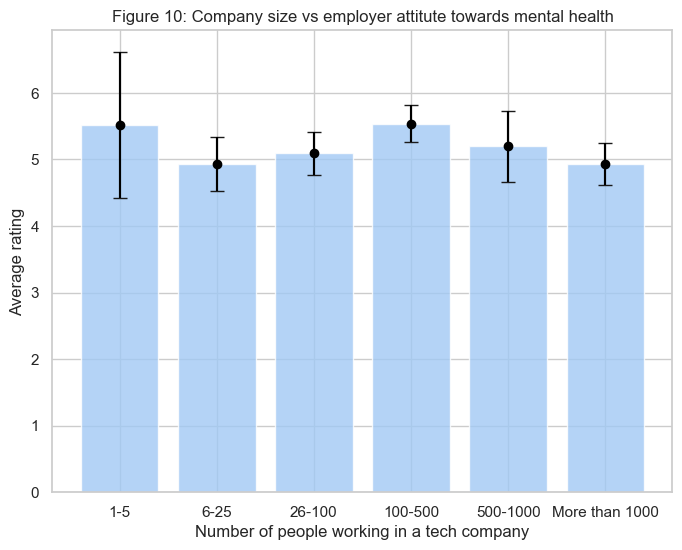

In [52]:
# Creating the bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(df_size[8], df_size['average_score'], yerr=df_size['ME'], capsize=5, alpha = 0.8)

# Adding error bars
plt.errorbar(df_size[8], df_size['average_score'], yerr=df_size['ME'], fmt='o', color='black')

# Adding labels and title
plt.xlabel('Number of people working in a tech company')
plt.ylabel('Average rating')
plt.title('Figure 10: Company size vs employer attitute towards mental health')

# Displaying the plot
plt.show()


There does not seem to be an obvious pattern. The large error bars that are overlapping do not allow us to clearly state that there is a statistically significant difference between the groups.

# Summary and Conclusions
1) Socio-demographics of the sample: Sample size increases from around 1230 in 2014 to around 1430 in 2016 (while no data was obtained in 2015), then there is an exponential decrease from 2016 to 2019. The gender of the respondents in predominantly male, but the proportion of males appears to be decreasing over the years. Most of the respondents are between the ages 25 and 35. 88.7% of people who participated in the survey are white, while most are from english speaking countries: over 2500 out of 4218 are from USA, around 500 are from the UK and around 200 are from Canada. The participants from the USA are spread quite evenly across the states. From all this information, we can conclude that the sample is predominantly white, male adults from mid twenties to around mid thirties that are mostly from english speaking countries. These facts, could be evidence of sampling bias (due to overrepresentation of caucasian males), but could also just mean that this ethic group is simply overrepresented in the tech industry.

2) Data clean up: Answer table was imported into a dataframe with SQL and the dataframe was pivoted to a long form. Then, United States was converted to United States of America. Leading and trailing spaces were removed, -1s denoting missing values were converted to NaNs, and columns containing numerical values were converted from object to numerical types. Columns containing 10 or more unique values were selected for correlation analysis.

3) Correlation analysis: The largest correlations were found between q.64-q.65 (0.56) and q.76-q.77 (0.57), showing that employers that are perceived as valuing physical health are also perceived as valuing mental health (and vice versa). Another interesting discovery was correlations between q.65-q.81 (0.37) and q.65-80 (0.33). These are moderately weak correlations, but they show that employers who create environment that facilitates mental health in the workplace tend to make career outcomes of mentally ill employees and co-worker reactions towards mentally ill employees more positive.

4) Mental illness in the Tech: Three most prevalent illness in the mental tech are anxiety disorders, mood disorders, and ADHD with prevalence rates of 23.1 ± 2.8(%), 11.9 ± 2.1(%), and 1.4 ± 0.8(%) respectively. Due to the nature of the question, it is likely that the anxiety disorders and mood disorders are over-represented and other illnesses are could be under-represented. Overall, though, it does not appear that people working in the tech are more susceptible to mental illness, since there is no clear difference in the history of mental illness between people working in the tech and not

5) Best/ worst geography and company size for mental health: Our data analysis showed that Sweden, Australia and the Netherlands are the best countries for mental health in the tech sector, while Germany, New Zeland, and Russia are rated as the worst. Secondly, it appears that company size plays no role in perceived employer attitute towards mental health, which is quite surprising.

# Implication of results

Due to overrepresentation of white, male caucasians from english speaking countries we cannot safely infer facts about the whole tech industry from this dataset, inference could only be made about the demographics of the sample. However, we can safely conclude that employers that are perceived as valuing physical health are perceived as valuing mental health as well. This suggests that in order to improve employee's mental health, there should be a strong emphasis in the company to support physical health. This means that providing employees with health, dental, or life insurance, for example, will be indirectly seen as an attempt at improving mental health of the worker as well. Also, funding or facilitating sporting or outdoor activites could, then, have a similar result. Interestingly, it appears that perception that an employer cares about mental health allows people to talk more freely about their mental issues. This is very important, since early diagnosis at the onset of a mental illness could greatly improve treatment outcomes, save health and life of an individual, and prevent productivity loss due sick-leave days. Additionally, workers feel that an employer who cares about mental health will create an environment, where their careers are less at risk, due to illness. Lastly, having identified the best countries when it comes to mental health in the tech industry, mental health in this sector could be improved by observing the work models of the top countries. For example, Sweden has one of the highest shares of government spending on mental health services, its citizens are some of the least likely to work long hours, while having over 15 hours of free time every day. So learning from these top countries, such as Sweden, could help improve mental health in the tech globally.

# Potential improvements for data analysis

1) Survey more people, especially women and non-whites. As mentioned in the previous section, the sample in this survey is over-represented by white males from english speaking countries. It would be highly informative to know the opinions of women and ethnic/racial minorities.

2) Running too many SQL queries. There are 7 SQL queries in this Jupyter Notebook file, which could be computationally intense. Better alternative would be to load the answer table in to a one big dataframe, then using that dataframe to plot all the neccessary plots.

3) Avoid creating too many dataframes. It was possible to do the same analysis, but without splicing the df_wide dataframe. This would have made the code more concise.

4) Avoid redundancy. Data cleaning was technically done twice: once for the first 6 plots, and then again for the other 4.

5) Make code style more consistent. For the first 6 figures, I am using pandasql module to splice the dataframe and later I am using pandas.

6) Avoid using pie charts in the future.